## 1. Loading DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dfx = pd.read_csv("Dataset/weightedX.csv")
dfy = pd.read_csv("Dataset/weightedY.csv")

In [3]:
X = np.array(dfx.values)
Y = np.array(dfy.values)

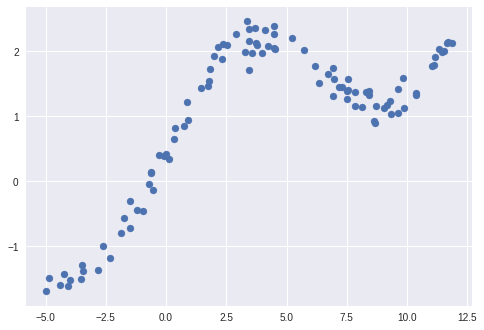

In [4]:
plt.style.use("seaborn")
plt.scatter(X,Y)
plt.show()


# 2. Find out W

In [86]:
def getwmatrix(X,X_Test,tau):
    m = X.shape[0]
    w = np.mat(np.eye(m))
    #print(X.shape)
    
    for i in range(m):
        w[i,i] = np.exp(np.dot((X[i]-X_Test),(X[i]-X_Test).T)/(-2*tau*tau))
        
    return w

In [87]:
X = np.mat(X)
Y = np.mat(Y)
w = getwmatrix(X,-1,100)
print(w)

[[ 0.99944411  0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.99993586  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.99944004 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.99870141  0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.99685816  0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.99410352]]


# 3. Make Prediction

In [88]:
def predict(X,Y,query_X,tau):
    M = X.shape[0]
    ones = np.ones((M,1))
    X_ = np.hstack((X,ones))
    
    qx = np.mat([query_X,1])
    
    W = getwmatrix(X_,qx,tau)
    
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    
    pred = np.dot(qx,theta)
    
    return theta,pred
    

In [89]:
theta,pred = predict(X,Y,1.0,1)

In [90]:
theta

matrix([[ 0.62752932],
        [ 0.46361782]])

In [91]:
pred

matrix([[ 1.09114714]])

## 4. Effect of Tau

In [92]:
def plotprediction(tau):
    X_test = np.linspace(-5,12,30)
    Y_test = []
    
    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
    
    Y_test = np.array(Y_test)
    
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.title("Tau = %.2f"%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color = 'red')
    plt.show()
        
    


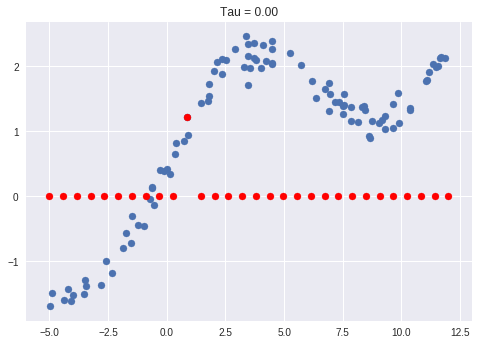

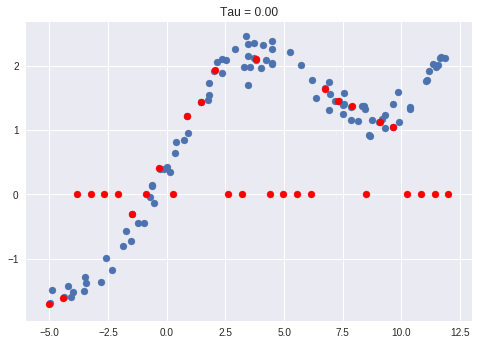

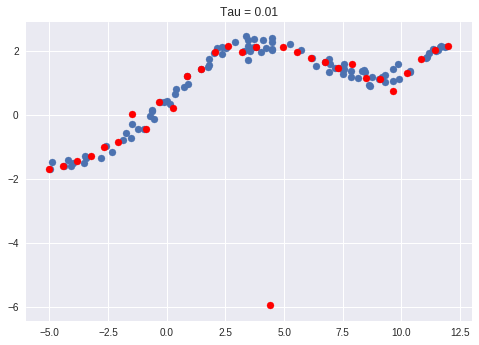

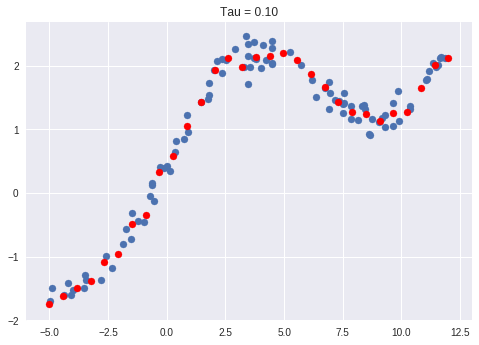

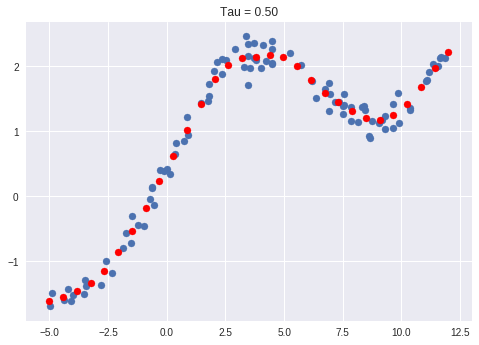

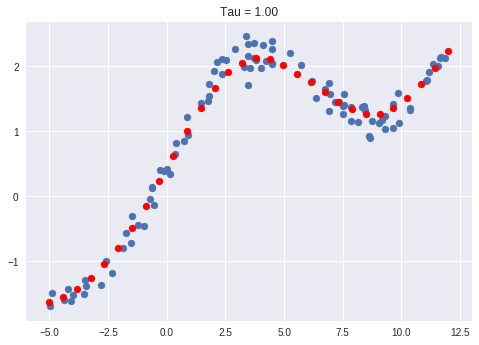

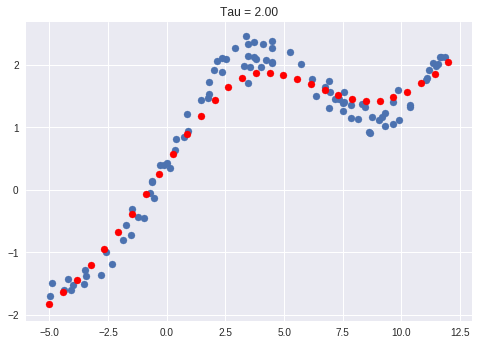

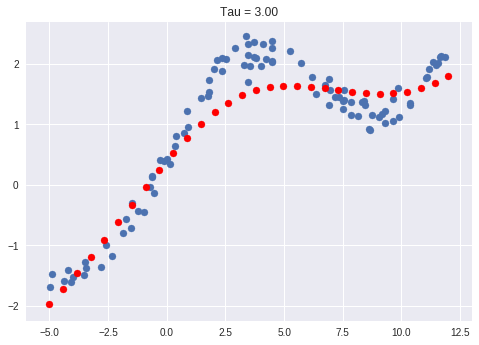

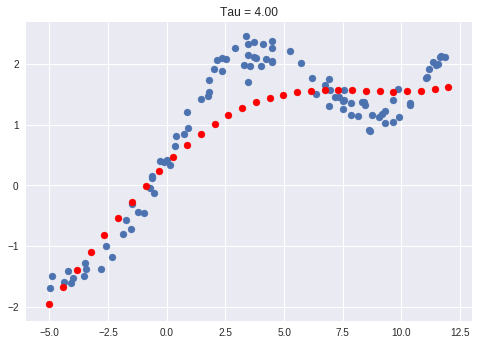

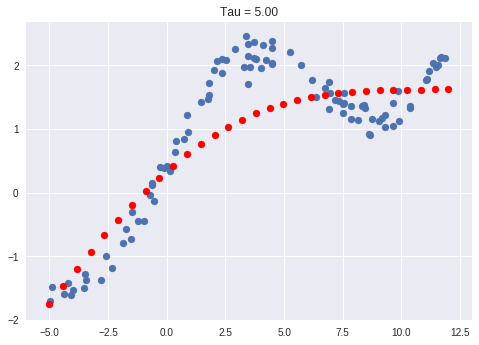

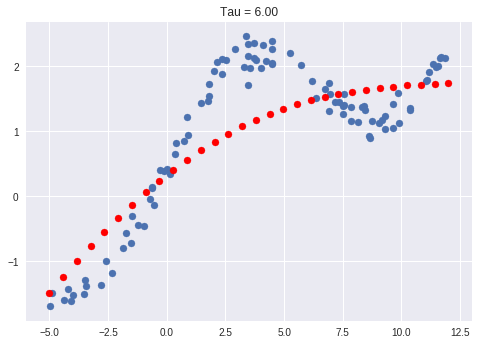

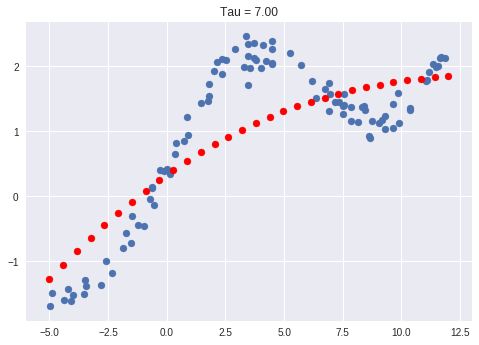

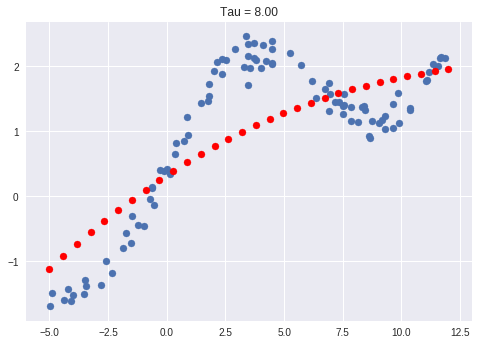

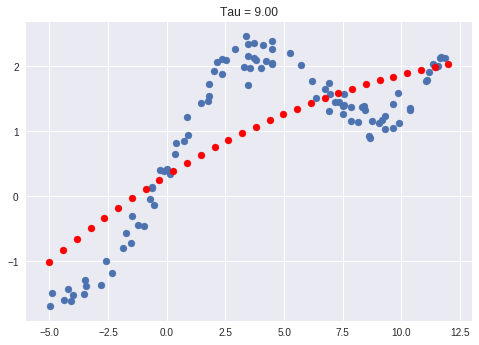

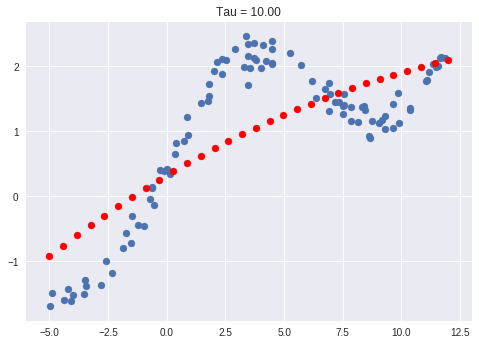

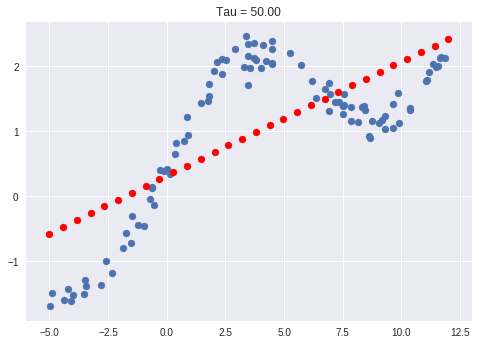

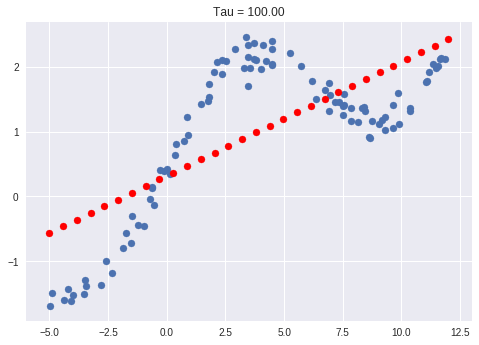

In [120]:
taus = [0.0001,0.001,0.01,0.1,0.5,1,2,3,4,5,6,7,8,9,10,50,100]
for t in taus:
    plotprediction(t)